<a href="https://colab.research.google.com/github/srinijammula/StockMarket/blob/main/StockMarketAnalysisPredictioN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTS##


In [ ]:
!pip install -q yfinance #for live data from yahoo finance

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [ ]:
from sklearn.preprocessing import MinMaxScaler #for transformation

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 438 kB 62.5 MB/s 
     |████████████████████████████████| 5.9 MB 58.4 MB/s 
     |████████████████████████████████| 1.7 MB 46.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninsta

In [ ]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
pip install pandas_datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fix_yahoo_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

##DATA PRE-PROCESSING##


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end1= datetime.now()
start1 = datetime(end1.year - 1, end1.month, end1.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start1, end1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df_use=df[df['company_name']=='APPLE']
#print(df_use)
df_use1=df_use.drop(df.columns[[6]],axis=1)
df_use1['Dates']=df_use.index
print(df_use1)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-08-23  148.309998  150.190002  147.889999  149.710007  148.875763   
2021-08-24  149.449997  150.860001  149.149994  149.619995  148.786270   
2021-08-25  149.809998  150.320007  147.800003  148.360001  147.533279   
2021-08-26  148.350006  149.119995  147.509995  147.539993  146.717865   
2021-08-27  147.479996  148.750000  146.830002  148.600006  147.771957   
...                ...         ...         ...         ...         ...   
2022-08-15  171.520004  173.389999  171.350006  173.190002  173.190002   
2022-08-16  172.779999  173.710007  171.660004  173.029999  173.029999   
2022-08-17  172.770004  176.149994  172.570007  174.550003  174.550003   
2022-08-18  173.750000  174.899994  173.119995  174.149994  174.149994   
2022-08-19  173.029999  173.740005  171.309998  171.520004  171.520004   

              Volume      Dates  
Dat

##KNN,SVM,RANDOM FOREST##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
X= df_use1[['Open', 'High', 'Low']]
X.head()

,Open,High,Low
Date,,,
2021-08-23,148.309998,150.190002,147.889999
2021-08-24,149.449997,150.860001,149.149994
2021-08-25,149.809998,150.320007,147.800003
2021-08-26,148.350006,149.119995,147.509995
2021-08-27,147.479996,148.750000,146.830002


###KNN###

In [ ]:
Y= np.where(df_use1['Close'].shift(-1)>df_use1['Close'],1,-1)

In [ ]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df_use1))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.5263157894736842

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[11, 25],
       [11, 29]])

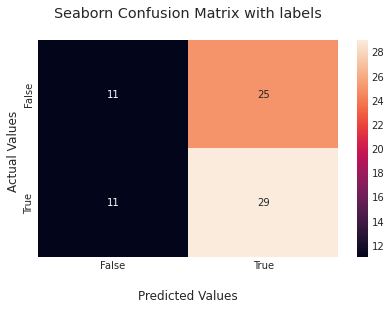

In [ ]:
confm(cf_matrix)

###SVM###

In [ ]:
# Support vector classifier
from sklearn.svm import SVC
cls = SVC().fit(X_train, Y_train)

In [ ]:
Y_pred=cls.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.5526315789473685

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[ 7, 29],
       [ 5, 35]])

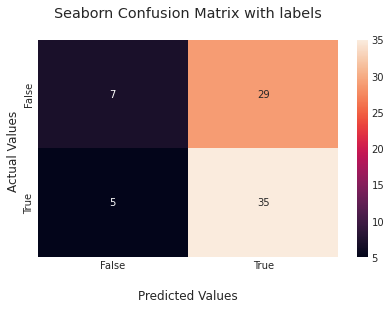

In [ ]:
confm(cf_matrix)

###RANDOM FOREST###

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=5)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=5)

In [ ]:
Y_pred=model.predict(X_test)
accuracy_score(Y_test, Y_pred.round(), normalize=False)

22

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred.round())
cf_matrix

array([[ 1, 22, 13],
       [ 0,  0,  0],
       [ 4, 15, 21]])

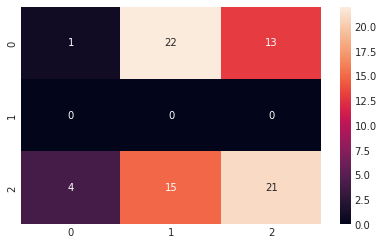

In [ ]:
sns.heatmap(cf_matrix,annot=True)
plt.show()

##MULTIVARIATE LSTM##

In [ ]:
# Indexing Batches
train_df = df_use1.sort_values(by=['Dates']).copy()

# List of considered Features
FEATURES = ['Open', 'High', 'Low', 'Close', 'Volume']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Open', 'High', 'Low', 'Close', 'Volume']


,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2022-08-15,171.520004,173.389999,171.350006,173.190002,54091700,173.190002
2022-08-16,172.779999,173.710007,171.660004,173.029999,56377100,173.029999
2022-08-17,172.770004,176.149994,172.570007,174.550003,79542000,174.550003
2022-08-18,173.750000,174.899994,173.119995,174.149994,62290100,174.149994
2022-08-19,173.029999,173.740005,171.309998,171.520004,70211500,171.520004


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(251, 5)


In [ ]:
import math

In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and test data sets
# As a first step, we get the number of rows to train the model on 80% of the data
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

[[[0.34703179 0.35212665 0.37639787 0.37824851 0.12388438]
  [0.36872128 0.36538081 0.40155751 0.37651586 0.04925382]
  [0.37557061 0.35469845 0.37460082 0.35226187 0.11649929]
  ...
  [0.37576105 0.41107809 0.41293944 0.43330146 0.38254787]
  [0.32629366 0.34718105 0.34684524 0.37998088 0.54362321]
  [0.35996954 0.34243317 0.37460082 0.36381155 0.21749474]]

 [[0.36872128 0.36538081 0.40155751 0.37651586 0.04925382]
  [0.37557061 0.35469845 0.37460082 0.35226187 0.11649929]
  [0.34779299 0.33095934 0.36880992 0.33647732 0.04919424]
  ...
  [0.32629366 0.34718105 0.34684524 0.37998088 0.54362321]
  [0.35996954 0.34243317 0.37460082 0.36381155 0.21749474]
  [0.35369097 0.37942644 0.39157348 0.38421574 0.18209874]]

 [[0.37557061 0.35469845 0.37460082 0.35226187 0.11649929]
  [0.34779299 0.33095934 0.36880992 0.33647732 0.04919424]
  [0.33124028 0.32363995 0.35523179 0.3568818  0.09585017]
  ...
  [0.35996954 0.34243317 0.37460082 0.36381155 0.21749474]
  [0.35369097 0.37942644 0.3915734

In [ ]:

from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

250 50 5


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 12s 741ms/step - loss: 0.1364 - val_loss: 0.0163
Epoch 2/50
10/10 [==============================] - 3s 279ms/step - loss: 0.0233 - val_loss: 0.0216
Epoch 3/50
10/10 [==============================] - 3s 292ms/step - loss: 0.0168 - val_loss: 0.0149
Epoch 4/50
10/10 [==============================] - 3s 278ms/step - loss: 0.0153 - val_loss: 0.0137
Epoch 5/50
10/10 [==============================] - 3s 343ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 6/50
10/10 [==============================] - 3s 329ms/step - loss: 0.0114 - val_loss: 0.0126
Epoch 7/50
10/10 [==============================] - 3s 301ms/step - loss: 0.0105 - val_loss: 0.0118
Epoch 8/50
10/10 [==============================] - 3s 291ms/step - loss: 0.0105 - val_loss: 0.0130
Epoch 9/50
10/10 [==============================] - 3s 286ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 10/50
10/10 [==============================] - 3s 286ms/step - loss: 0.0099 - val_loss: 0.010

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)
print(y_pred_scaled)
# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
print("val")
print(y_pred)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

print(len(y_test_unscaled))
print("end")
print(len(y_pred))
print('Accuracy:', 100 - (100*(abs(y_test_unscaled[0:50]-y_pred[0:50]))/y_test_unscaled.mean()).mean())

2/2 [==============================] - 0s 115ms/step
[[0.35994974]
 [0.32813945]
 [0.2448841 ]
 [0.14649317]
 [0.10472607]
 [0.11026195]
 [0.08338254]
 [0.06519669]
 [0.09849676]
 [0.12449739]
 [0.14964944]
 [0.19111665]
 [0.2266607 ]
 [0.21274574]
 [0.18961534]
 [0.15185827]
 [0.15189509]
 [0.1808139 ]
 [0.22947785]
 [0.28692448]
 [0.32788113]
 [0.3275262 ]
 [0.3277733 ]
 [0.31261152]
 [0.32566747]
 [0.3707169 ]
 [0.38011107]
 [0.39195162]
 [0.43006325]
 [0.4697169 ]
 [0.48455432]
 [0.4720383 ]
 [0.44175783]
 [0.4633994 ]
 [0.50122464]
 [0.5823851 ]
 [0.62699044]
 [0.6127489 ]
 [0.6366132 ]
 [0.67281324]
 [0.6614868 ]
 [0.6586188 ]
 [0.6444194 ]
 [0.68961954]
 [0.72229   ]
 [0.75193363]
 [0.7807448 ]
 [0.78280956]
 [0.7916429 ]
 [0.7980334 ]]
val
[[148.75938]
 [147.10684]
 [142.78172]
 [137.67032]
 [135.50052]
 [135.7881 ]
 [134.39172]
 [133.44698]
 [135.1769 ]
 [136.52763]
 [137.83429]
 [139.98851]
 [141.83502]
 [141.11214]
 [139.9105 ]
 [137.94904]
 [137.95094]
 [139.45328]
 [141.98

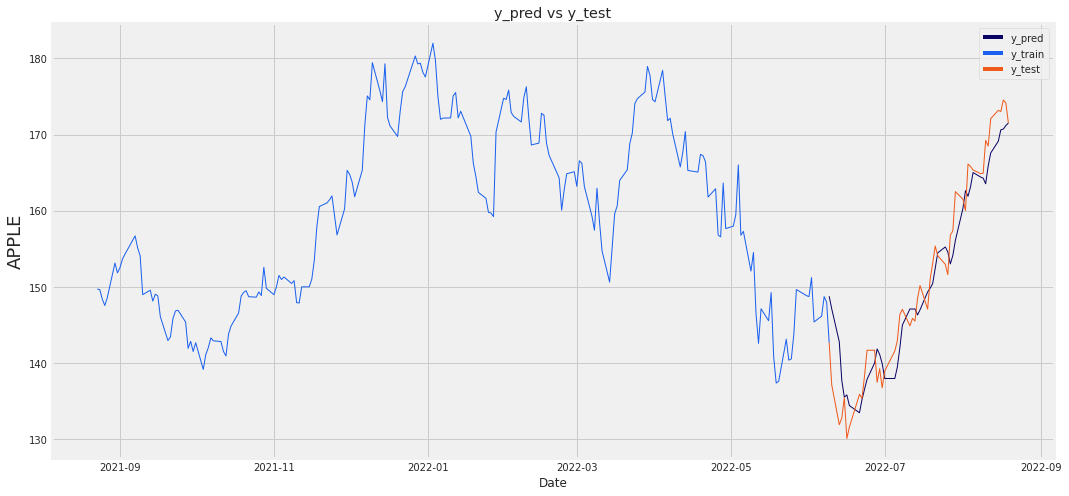

In [ ]:
# The date from which on the date is displayed
display_start_date = "2019-01-01"

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel('APPLE', fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

plt.legend()
plt.show()

In [ ]:
df_temp = df_use1[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus =''
print(f'The close price for APPLE at {end1} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

1/1 [==============================] - 0s 37ms/step
The close price for APPLE at 2022-08-22 07:20:53.918157 was 171.52
The predicted close price is 169.9199981689453 (-0.94%)


##UNIVARIATE LSTM##

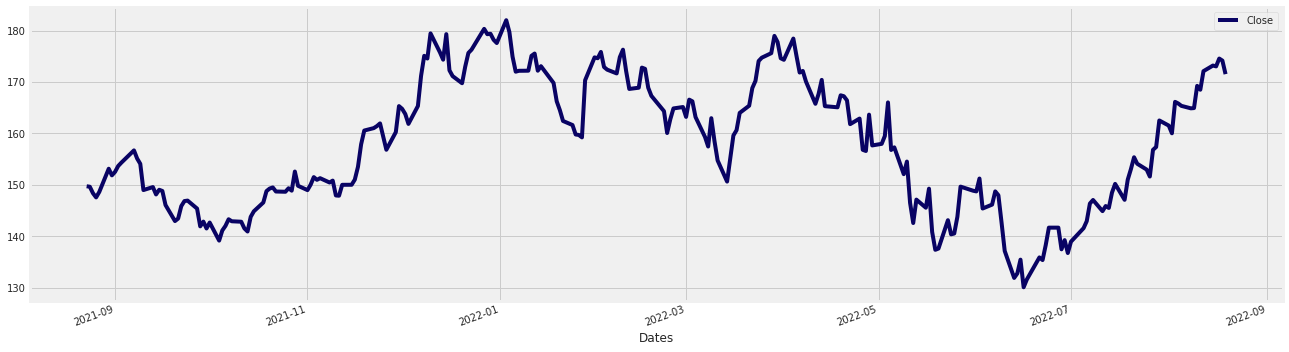

In [ ]:
%matplotlib inline
df_use1.plot(x='Dates', y='Close', kind='line', figsize=(20,6), rot=20)

In [ ]:
FullData=df_use1[['Close']].values
print(FullData[0:10])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

print('### After Normalization ###')
print(X[0:5])

[[149.71000671]
 [149.61999512]
 [148.36000061]
 [147.53999329]
 [148.6000061 ]
 [153.11999512]
 [151.83000183]
 [152.50999451]
 [153.6499939 ]
 [154.30000305]]
### After Normalization ###
[[0.37824851]
 [0.37651586]
 [0.35226187]
 [0.33647732]
 [0.3568818 ]]


In [ ]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(241, 10, 1)

#### Output Data shape ####
(241, 1)


In [ ]:
# Choosing the number of testing data records
TestingRecords=int(len(FullData)/3)

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(158, 10, 1)
(158, 1)

#### Testing Data shape ####
(83, 10, 1)
(83, 1)


In [ ]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.37824851]
 [0.37651586]
 [0.35226187]
 [0.33647732]
 [0.3568818 ]
 [0.44388833]
 [0.41905689]
 [0.43214626]
 [0.45409043]
 [0.46660264]] -- [0.5126084]
[[0.37651586]
 [0.35226187]
 [0.33647732]
 [0.3568818 ]
 [0.44388833]
 [0.41905689]
 [0.43214626]
 [0.45409043]
 [0.46660264]
 [0.5126084 ]] -- [0.4821945]


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
! pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.9.1


In [ ]:
import matplotlib.dates as mdates

In [ ]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))



# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
32/32 [==============================] - 12s 28ms/step - loss: 0.3715
Epoch 2/100
32/32 [==============================] - 1s 25ms/step - loss: 0.1570
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.0253
Epoch 4/100
32/32 [==============================] - 1s 26ms/step - loss: 0.0199
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0188
Epoch 6/100
32/32 [==============================] - 1s 26ms/step - loss: 0.0176
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0171
Epoch 8/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0177
Epoch 9/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0173
Epoch 10/100
32/32 [==============================] - 1s 25ms/step - loss: 0.0166
Epoch 11/100
32/32 [==============================] - 1s 25ms/step - loss: 0.0154
Epoch 12/100
32/32 [==============================] - 1s 23ms/step - loss: 0.0158
Epoch 13/100
32/32 [====

3/3 [==============================] - 0s 6ms/step
Accuracy: 96.94899263970618
<class 'numpy.ndarray'>


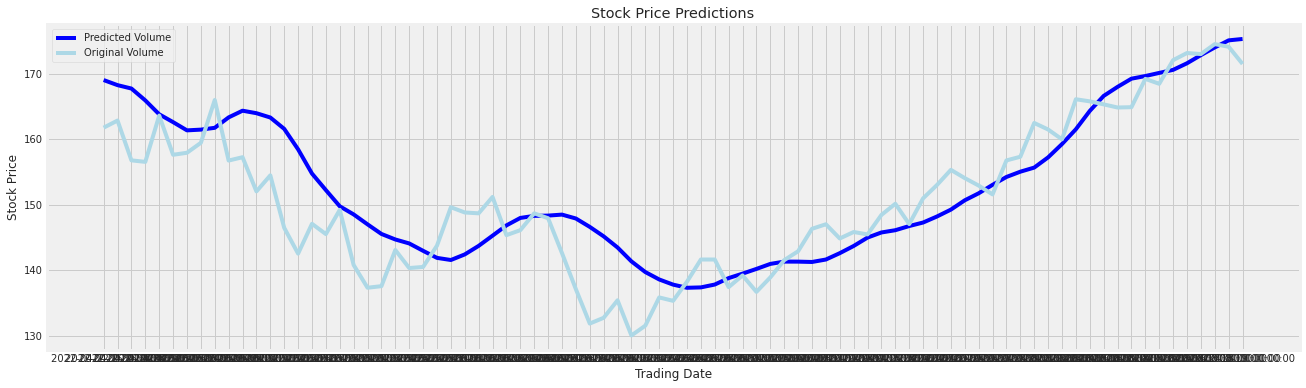

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), df_use1.tail(TestingRecords)['Dates'])
plt.ylabel('Stock Price')
print(type(FullData))
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

In [ ]:
# Last 10 days prices
Last10DaysClose=np.array(df_use1['Close'].tail(10))
print(Last10DaysClose)
# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10DaysClose.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)


# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

[164.86999512 164.91999817 169.24000549 168.49000549 172.1000061
 173.19000244 173.02999878 174.55000305 174.1499939  171.52000427]
1/1 [==============================] - 0s 27ms/step


array([[175.15102]], dtype=float32)

In [ ]:
# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[164.86999512]
 [164.91999817]
 [169.24000549]
 [168.49000549]
 [172.1000061 ]
 [173.19000244]
 [173.02999878]
 [174.55000305]
 [174.1499939 ]
 [171.52000427]]
###################
Scaled Prices
[0.67006736 0.67102989 0.75418692 0.73974996 0.80923987 0.83022151
 0.82714155 0.85640054 0.84870065 0.79807525]


In [ ]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###')
print(y_data.shape)

### Input Data Shape ###
(236, 10, 1)
### Output Data Shape ###
(236, 5)


In [ ]:
# Choosing the number of testing data records
TestingRecords=int(len(FullData)/3)

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(153, 10, 1)
(153, 5)

#### Testing Data shape ####
(83, 10, 1)
(83, 5)


In [ ]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.37824851]
 [0.37651586]
 [0.35226187]
 [0.33647732]
 [0.3568818 ]
 [0.44388833]
 [0.41905689]
 [0.43214626]
 [0.45409043]
 [0.46660264]]
====>
[0.5126084  0.4821945  0.46217538 0.36400394 0.37516856]
####################
[[0.37651586]
 [0.35226187]
 [0.33647732]
 [0.3568818 ]
 [0.44388833]
 [0.41905689]
 [0.43214626]
 [0.45409043]
 [0.46660264]
 [0.5126084 ]]
====>
[0.4821945  0.46217538 0.36400394 0.37516856 0.34764194]
####################


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###################################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
31/31 [==============================] - 5s 13ms/step - loss: 0.3667
Epoch 2/100
31/31 [==============================] - 0s 14ms/step - loss: 0.2369
Epoch 3/100
31/31 [==============================] - 0s 15ms/step - loss: 0.1017
Epoch 4/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0605
Epoch 5/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0406
Epoch 6/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0313
Epoch 7/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0271
Epoch 8/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0250
Epoch 9/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0230
Epoch 10/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0230
Epoch 11/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0220
Epoch 12/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 13/100
31/31 [=====

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

3/3 [==============================] - 0s 6ms/step
#### Predicted Prices ####
[[166.06938 166.66801 165.31902 166.07611 165.78023]
 [166.85707 167.31577 166.208   166.92638 166.53941]
 [166.76137 167.15337 166.18613 166.92366 166.4849 ]
 [165.86528 166.23158 165.37544 166.29686 165.72733]
 [166.64731 166.84113 166.30743 167.30655 166.51859]
 [167.70482 167.72432 167.47539 168.27809 167.50143]
 [166.87315 166.92049 166.64928 167.41745 166.73404]
 [165.64452 165.74014 165.43541 166.28522 165.62505]
 [163.80559 163.93895 163.62901 164.36284 163.92975]
 [162.69458 162.80185 162.61246 163.50935 162.97427]
 [162.07724 162.12761 162.15889 163.78818 162.59471]
 [162.39392 162.34413 162.57066 164.26186 162.93396]
 [162.99237 162.85954 163.22598 164.90451 163.5043 ]
 [162.79675 162.5863  163.12375 164.84714 163.36949]
 [164.32343 163.89656 164.75087 165.9744  164.72873]
 [165.1926  164.62006 165.68541 166.48314 165.48238]
 [164.87454 164.3023  165.37167 166.07646 165.17651]
 [162.03427 161.68222

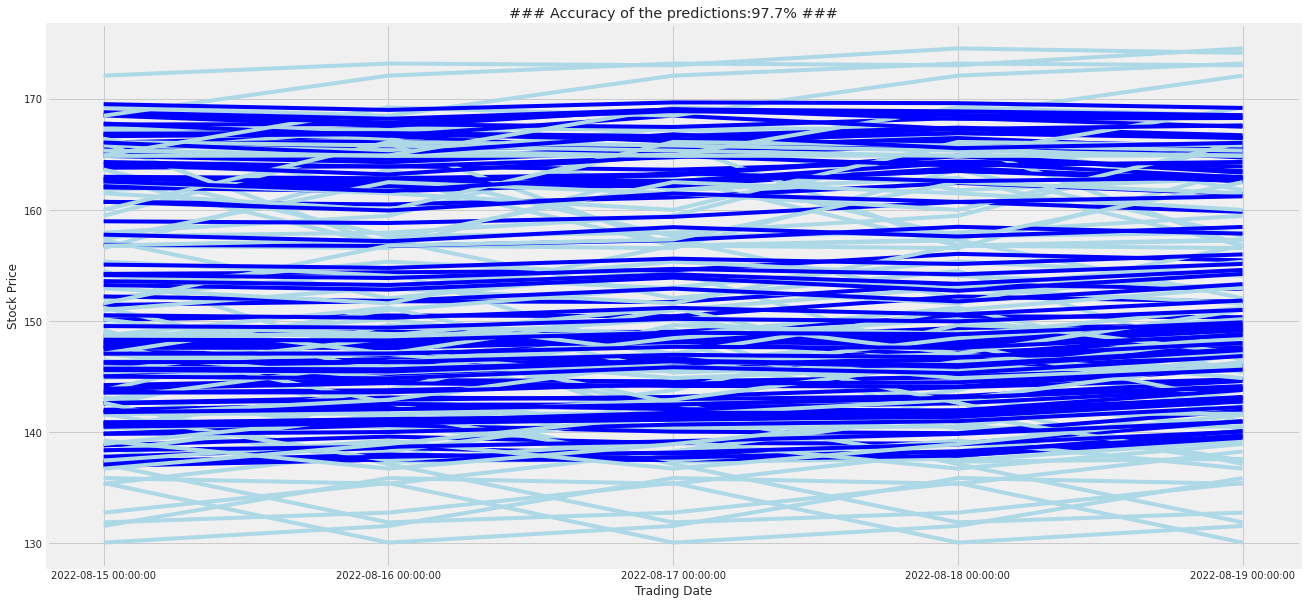

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]

    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')

    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')

    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=df_use1.shape[0]

plt.xticks(range(FutureTimeSteps), df_use1.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['Dates'])
plt.ylabel('Stock Price')
#plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

##PREDICTION FOR NEXT 5 DAYS USING PREVIOUS 10 DAYS DATA##

In [ ]:
# Making predictions on test data
Last10DaysPrices=np.array(df_use1['Close'].tail(10))

# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(X_test)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)

Next5DaysPriceDF=pd.DataFrame(Next5DaysPrice.reshape(5,1),columns=["Close"])
Next5DaysPriceDF['Dates']=pd.date_range(start=end1, periods=5, freq='D')
print(Next5DaysPriceDF)

1/1 [==============================] - 0s 115ms/step
        Close                      Dates
0  173.393143 2022-08-22 07:20:53.918157
1  173.224411 2022-08-23 07:20:53.918157
2  172.938263 2022-08-24 07:20:53.918157
3  172.217941 2022-08-25 07:20:53.918157
4  172.382324 2022-08-26 07:20:53.918157


##VISUALIZATION##

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
# Get some data
fig = px.line(df_use1, x='Dates', y='Close')
# Only thing I figured is - I could do this
fig.add_scatter(x=Next5DaysPriceDF['Dates'], y=Next5DaysPriceDF['Close'])

# Show plot
fig.show()